# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [5]:
# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
#### 'RM' : average number of rooms among homes in the neighborhood
*When considering purchasing a new home, buyers tend to see a house with more rooms as a positive feature. Houses with more rooms can have greater square footage and a higher demand.*
- As `'RM'` increases, the value of `'MEDV'` tends to increase.

#### 'LSTAT' : precentage of homeowners in the neighborhood considered "lower class" (working poor).
*If we can assume the `'LSTAT'` feature can give use an accurate depiction of the income within the community we are able to extrapolate housing values. One extrapolation we are able to make is that the working poor live in households that are valued corresponding to their income. If this assumption is true, the housing values will be comparatively low*
- As `'LSTAT'` increases, the value of `'MEDV'` tends to decrease

#### 'PTRATIO' : ratio of students to teachers in primary and secondary schools in the neighborhood
*The 'PTRAIO' feature can inform us about the quality of schools in the neighborhood. When a family is considering purchasing a new home, they might consider the quality of schools in the neighborhood to evaluate housing prices. If we assume that a high ratio of students to teachers means classrooms with more students we can extrapolate the quality of education within those primary and secondary schools. A higher ratio can mean lower quality of education while a low ratio can mean higher quality. It may not be a primary feature in the housing prices and have a lower coefficient of correlation.*
- As `'PTRATIO'` increases, the value of `'MEDV'` tends to decrease

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [6]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [7]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
The coefficient of determination evaluated to 0.923 which implies that 92.3% of the variability between our `True Value` and `Prediction` can be accounted for based on simple linear regression versus the calculated mean. 

Although this metric can lead us to conlude that we have captured the variation of the target variable we have to be careful in considering our small sample size. Because the sample size of the pairs is 5 the confidence interval of the mean value and the prediction interval of a specific value will be large. 

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [8]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
# Test size is 20% and Train size is 80%
# Since we are trying to predict housing prices, we will take the features as our dependent variable, X
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.20, random_state = 1337)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **
A model for a learning algorithm cannot be properly assessed without testing. For most of the learning algorithms we use hundreds of data points that allows us to take full advantage of assessing model validity. For most regression methods a difference between 200 and 250 data points does not narrow our confidence intervals or prediction intervals as much as a difference between 10 and 60 data points. We have nearly 500 data points to create an algorithm to predict housing prices while we only need 20% to create our first model. Rather than use the extra 80% of data points in that single initial model we can use those data points more efficiently by creating a testing data set. By iterating on our learning algorithm we are creating a more accurate model with greater predictive power. 

If we do not create a testing subset we have an untested algorithm that is less accurate than a model with K-Fold testing subsets. Without testing our model we cannot be sure it can be applied in practice.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

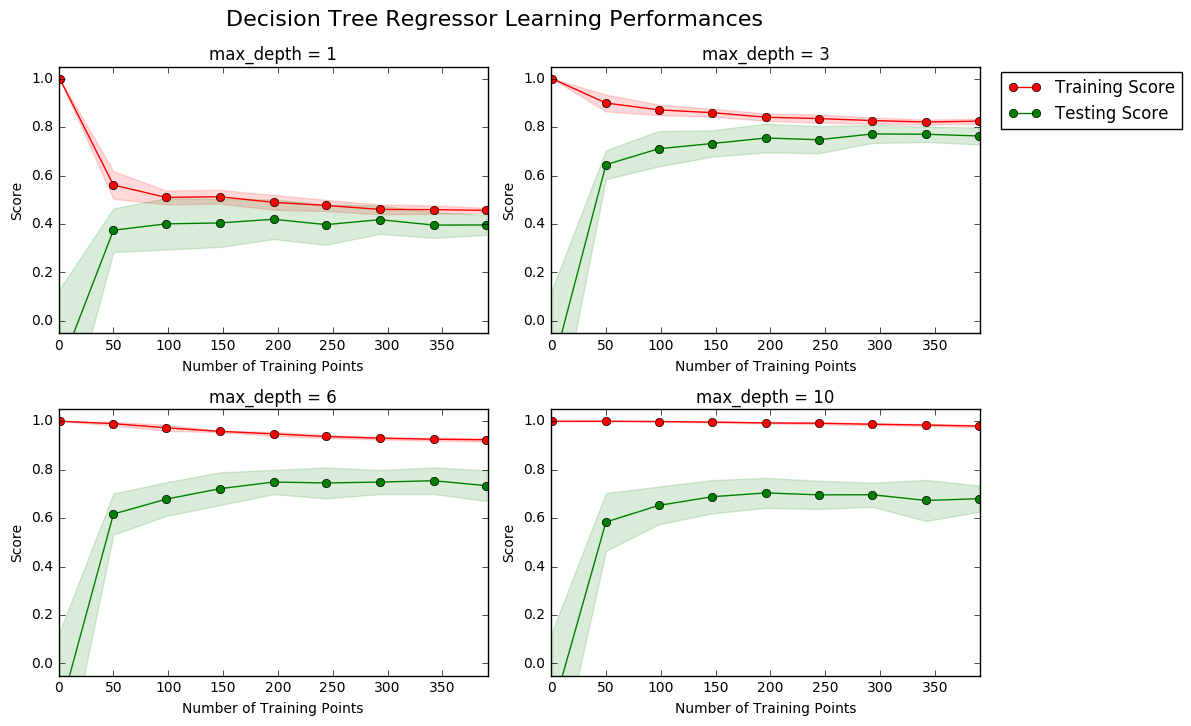

In [9]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **
#### Graph max_depth = 3
As we add more training points to the training curve we can account for less and less variability according to the r^2 score but it is converging and stabilizing after a sufficient amount of training points. With respect to the testing curve, we can see that adding training points increases our ability to account for variability that converges near the same value as our training curve. Any additional training points after 200 does not significantly benefit the model.   

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

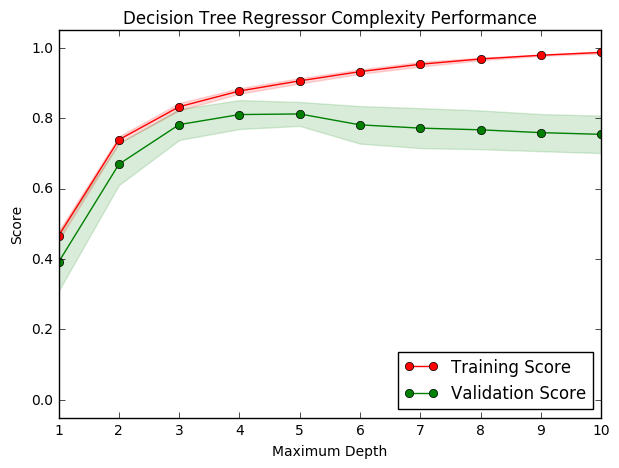

In [10]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **
#### Maximum Depth 1
When the model is trained with a maximum depth of 1 the model suffers a high bias because it is not complex enough to capture the underlying relationships. This is evident by the low training and validation scores.
#### Maximum Depth 10
When the model is trained with a maximum depth of 10 the model suffers a high variance because it over complicates tha data found in the training set. The model is more sensitive and produces an overfitting error. This can be seen by the gap between the Training Score line and the Validation Score line. 

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **
I think a maximum depth of 4 can best generalize unseen data. We see the highest validation score at a depth of 4 and anything more than 4 increases variance without increasing score. The graph indicates a small variance but it is normal while the highest point on the Validation Score line is at the depth of 4. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **
The grid search technique is useful for finding optimal parameters to use for a training algorithm. In scklearn, the technique is implemented through GridSearchCV and essentially automates evaluating combinations of different paramater tunes. GridSearchCV also cross validates through each iteration so we are able to properly determine what gives us the best performance. Essentially, it creates a grid or matrix of combinations that is assessed using cross validation. 

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
When given a large data set we are able to iterate through many different testing subsets. The number of times we divide and iterate through a training set is `k`. With a dataset of size `n`, we divide it into `k` equal partitions each with `n`/`k` data points. We choose one of the partitions to be our intial training data set. We then go through the remaining `k`-1 testing experiments and combined by averaging the performance to reach a final k-fold score. We can use this technique with a grid search to fully optimize a model. With grid search we are able to change the parameters we work with and by utilizing k fold cross validation with a grid search we are able to further optimize our model. Each technique by itself can produce better results but together they are able to give use the most optimal model. With only a grid search utilizing different parameters we are still not testing our model which can produce a model victim to overfitting.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [11]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn import grid_search

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = grid_search.GridSearchCV(regressor, params, scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [12]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 5 for the optimal model.


**Answer: **
My guess in question 6 was max_depth of 4 which is one less than the optimal model a grid search suggests. Both parameters are similar but with our performance method a max_depth of 5 is optimal. This indicates that it can best generalize the population given the sample sets. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [22]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

'''The following are metrics and statistics to better assess our model
Definitions of Accuracy:
- A correct and accurate prediction of a value falls within the prediction interval
- We define the prediction interval of a value as y +- z*sigma
- Where the z score represents the cumulative probability within our tolerance level
- We set our tolerance at 50% which means that 25% above and 25% below our predicted value is acceptable
- Thus, We use the z score of 0.67 based on a standard z table*
*http://college.cengage.com/mathematics/brase/understanding_basic/3e/students/appendix/app_andm.pdf
NOTE: This definition will not work for small sample sets because of a large sigma and more chances of a false negative'''
#Average number of rooms & sigma
print "Average number of rooms: {:.0f}".format(np.mean(features['RM']))
print "    =>sigma: {:.1f}".format(np.std(features['RM']))
#Average poverty level & sigma
print "Average poverty level: {:.0f}".format(np.mean(features['LSTAT']))
print "    =>sigma: {:.1f}".format(np.std(features['LSTAT']))
#Average pupil-student ratio & sigma
print "Average student-teacher ratio: {:.0f}".format(np.mean(features['PTRATIO']))
print "    =>sigma: {:.1f}".format(np.std(features['PTRATIO']))
#Coefficient of Determination (R^2) for our estimator based on our original dataset
rScore = reg.score(features, prices)
print "Coefficient of Determination: {}".format(rScore)
#Accuracy of our estimator
# 1. Create standard tolerance level for each prediction using methodology defined above
tolerance = 0.67 * std_price
# 2. Calculate accuracy using specified tolerance level
correct = 0
for i, price in enumerate(reg.predict(features)) :
    if price < (prices.iloc[i] - tolerance) or price > (prices.iloc[i] + tolerance) :
        continue #our predicted price is outside of tolerance
    else :
        correct += 1
accuracy = float(correct) / len(prices)
print "Percent accuracy: {:.2f}%".format(accuracy * 100)

Predicted selling price for Client 1's home: $428,209.09
Predicted selling price for Client 2's home: $291,200.00
Predicted selling price for Client 3's home: $1,021,650.00
Average number of rooms: 6
    =>sigma: 0.6
Average poverty level: 13
    =>sigma: 7.1
Average student-teacher ratio: 19
    =>sigma: 2.1
Coefficient of Determination: 0.875111413705
Percent accuracy: 93.05%


**Answer: **
Given the output from an optimized model, I would recommend each client to sell their homes to the following respective values:
- Client 1: 428,209.90
    - This client home has 5 rooms, a 17% poverty level and a 15 to 1 student-teacher ratio. The predicted value is close to the data set's average and median home value. Compared to the other two clients the home is also in the middle with respect to its features.  It has enough rooms, poverty, and a student-teacher ratio to be very average. The home is very close in value to the average's of each feature for the data set as outlined above in the output. 
- Client 2: 291,200.00
    - This client home has 4 rooms, a 32% poverty level and a 22 to 1 student-teacher ratio. Compared to the other clients, it has the lowest number of rooms, highest poverty, and the worst student-teacher ratio. As expected, the predicted value is comparatively low. The home is only one standard deviation above the minimum home value in our data set. The number of rooms falls many deviations under the mean while the poverty level and student-teacher ratio are more than one deviation above the mean.
- Client 3: 1,021,650.00
    - This client has 8 rooms, a 3% poverty level and a 12 to 1 student-teacher ratio. Every feature of the home is attractive and between our 3 clients it has the best values. The predicted value confirms that the home of client 3 is very valuable. The home comes very close to our maximum in the data set and is more than 4 standard deviations above the mean. This is reasonable because each feature can be seen as optimal for a family residence. We also observe that each feature is many standard deviations above or below the mean which supports its high predicted value

The prices use a machine learning algorithm that predicts the prices of their homes given the 3 features. These prices are reasonable because our model has a coefficient of determination of 0.875 and based on the stated definition of accuracy our model is correct 93.05% of the time over the entire data set. 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [14]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **
Because the sample data was collected from 1978 we cannot generalize our constructed model to a real-world setting. There are not enough features in each home to accurately account for everything a buyer considers. For Boston in 1978 the model may not be robust enough to give clients a good idea of their actual home value. The tolerance level constructed previously allows 110,664 dollars of error above or below the actual value which may not be reasonable in a real world setting. When lowering the tolerance to 10 percent or $21,472, a more reasonable margin, the accuracy drops to about 38 percent. This data set was collected in an urban enviornment so it may not be applicable to rural areas where there may be different features necessary to give a good prediction. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.